# For modifying and testing new image creation

Hello!  This in Matt's quick tutorial on how to create new model images
## Step 1
### Load nessecary modules

In [1]:
# Add python modules
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy
# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as SIMR
gm  = SIMR.gm
im  = SIMR.im
SIM = SIMR.SIM
IMG = SIMR.IMG
ms = SIMR.ms
sa = SIMR.sa
dc = SIMR.ms.dc

gm.test()
im.test()
SIMR.test()
SIM.test()
IMG.test()
ms.test()
dc.test()
sa.test()

GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew's information module for SPAM
SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
SM: Hi!  You're in Matthew's main code for all things simulation.
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


___
## Step 2
### Load Target Info class
Needed for loading the target image and running through models later.

In [2]:
tDir = '../targetDir/'
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING: target info class bad")
else:
    print("Target Good!", tInfo.get('target_id'))


Target Good! 587722984435351614


In [3]:

# Get run info class
rInfo = tInfo.getRunInfo( )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))

Run 'run_0000' Good!


In [4]:
spam_orb = gm.validPath('../Simulator/bin/orb_run')
print( spam_orb )

/home/jovyan/galStuff/galaxyJSPAM/Simulator/bin/orb_run


##  Test new orbit execution on 1 Run

In [5]:
# Change image name if you want to grab a different image parameter
old_params = gm.readJson( '../param/dl-s1-seed.json' )
old_param = old_params['dl-s1-seed']
gm.pprint( old_param )


{'cmpArg': {'direct_compare_function': 'absolute_difference',
            'targetName': 'dl-s1-seed',
            'targetType': 'target_image',
            'type': 'direct_image_comparison'},
 'comment': 'Test parameters for '
            'Stage-1 Data Generation '
            'for Deep-Learning project',
 'imgArg': {'blur': {'size': 5,
                     'type': 'gaussian_blur',
                     'weight': 0.75},
            'comment': 'Data Generation '
                       'for Deep '
                       'Learning '
                       'Project Stage '
                       '1.',
            'galaxy_centers': {'px': 64,
                               'py': 64,
                               'sx': 39,
                               'sy': 76},
            'image_size': {'height': 128,
                           'width': 128},
            'name': 'dl-s1-seed',
            'normalization': {'norm_constant': 2.5,
                              'type': 'type1'},
            '

In [6]:
# Create a blank group score parameter and copy starting parameters
newName = 'orbit'
new_params = {}
new_params[newName] = deepcopy( old_param )
new_params[newName]['comment'] = "Parameters to create initial orbit \
for a given run."

# ALWAYS modify the names
new_params[newName]['name'] = newName
new_params[newName].pop('scoreType')

# We only want to enter Simulation module but not run anything
new_params[newName].pop('imgArg')
new_params[newName].pop('simArg')
new_params[newName].pop('cmpArg')
gm.pprint(new_params)


{'orbit': {'comment': 'Parameters to '
                      'create initial '
                      'orbit for a '
                      'given run.',
           'name': 'orbit'}}


In [7]:
orbParam = gm.inArgClass()
orbParam.setArg('printAll', True )
orbParam.setArg('printBase', True )
orbParam.setArg('newOrbit', True )

SIM.main_sim_run( rInfo, orbParam )

SM.main_sm_run:
	 - Run ID: run_0000


	 - Please provide score parameters


___
## Step 3
### Run a few on a target


In [8]:
orbParam = gm.inArgClass()
orbParam.setArg('printAll', True )
orbParam.setArg('printBase', True )
orbParam.setArg('newOrbit', True )

# Limit number of runs
orbParam.setArg('startRun', 1 )
orbParam.setArg('endRun', 4 )

SIMR.target_main( orbParam, tInfo,  )

SIMR: target_main:
SIMR: target_new_scores:
SIMR: prep_score_parameters: 
	 - ParamType: <class 'NoneType'>
	 - scoreParamName: None
	 - scoreParamLoc : None
SIMR: target_prep_cmd_params: 587722984435351614
SIMR.target_prep_cmd_params: Printing new run argments

GM: Printing Input arguments
	- printBase - <class 'bool'> :  False
	- printAll - <class 'bool'> :  False
	- simple - <class 'bool'> :  False
	- runDir - <class 'NoneType'> :  None
	- targetDir - <class 'NoneType'> :  None
	- dataDir - <class 'NoneType'> :  None
	- newOrbit - <class 'bool'> :  True
	- startRun - <class 'int'> :  1
	- endRun - <class 'int'> :  4
	- tInfo - <class 'Support_Code.info_module.target_info_class'> :  <Support_Code.info_module.target_info_class object at 0x7f6d12246380>

None


	 - ParamType: <class 'NoneType'>
	 - scoreParamName: None
	 - scoreParamLoc : None


	 - Scores already exist!



___
## Step 4: Create a new image parameter


In [6]:
# Create a blank group score parameter and copy starting parameters
newName = 'dl-s1-seed'
new_params = {}
new_params[newName] = deepcopy( old_param )
new_params[newName]['comment'] = "Test parameters for Stage-1 Data Generation for Deep-Learning project"

# ALWAYS modify the names
new_params[newName]['name'] = newName
new_params[newName]['imgArg']['name'] = newName

# Leave a comment if its for a specific experiment
cmt = 'Data Generation for Deep Learning Project Stage 1.'
new_params[newName]['imgArg']['comment'] = cmt

# Change particle countnew_params[newName]['imgArg']['image_size']['width'] = 50
new_params[newName]['simArg'] = {'nPts': 4000,
                                'name': '4k',}

# If you want to resize the image
new_params[newName]['imgArg']['image_size']['width'] = 128
new_params[newName]['imgArg']['image_size']['height'] = 128

# For resizing image
new_params[newName]['imgArg'].pop('galaxy_centers')
new_params[newName]['imgArg']['target_resize'] = True

# If you want to modify the image blurring affect
new_params[newName]['imgArg']['blur'] = {}
new_params[newName]['imgArg']['blur']['type'] = 'gaussian_blur'
new_params[newName]['imgArg']['blur']['size'] = 5
new_params[newName]['imgArg']['blur']['weight'] = 0.75

# If you want to modify the radial brightness constant
new_params[newName]['imgArg']['radial_const'] = [ 1, 1 ]

# If you want to modify the final image brightness normalization
new_params[newName]['imgArg']['normalization'] = {}
new_params[newName]['imgArg']['normalization']['type'] = 'type1'
new_params[newName]['imgArg']['normalization']['norm_constant'] = 2.5

# Make sure scoring methods know to point to new image
new_params[newName]['cmpArg']['targetName'] = newName
gm.pprint(new_params)


{'dl-s1-seed': {'cmpArg': {'direct_compare_function': 'absolute_difference',
                           'targetName': 'dl-s1-seed',
                           'targetType': 'target_image',
                           'type': 'direct_image_comparison'},
                'comment': 'Test '
                           'parameters '
                           'for Stage-1 '
                           'Data '
                           'Generation '
                           'for '
                           'Deep-Learning '
                           'project',
                'imgArg': {'blur': {'size': 5,
                                    'type': 'gaussian_blur',
                                    'weight': 0.75},
                           'comment': 'Data '
                                      'Generation '
                                      'for '
                                      'Deep '
                                      'Learning '
                                      

___
## Step 4.1
### Create a new target Image
If the size and centers were modified, then create a new target image to match the size and centers



IC.adjustTargetImage:
	 - From: zoo_0
	 - To  : dl-s1-seed
	 - Creating new galaxy centers: 
	 - From: ( 513 , 514 ) ; ( 309 , 608 )
	 -   To: (  64 ,  64 ) ; (  39 ,  76 )
	 - From points:
[[513. 514.]
 [309. 608.]
 [607. 718.]]
	 - To points:
[[64. 64.]
 [39. 76.]
 [76. 89.]]
	 - Warp Matrix
[[ 0.12344407  0.00194244 -0.32522001]
 [-0.00194244  0.12344407  1.54622215]]
	 - Writing to loc: /home/jovyan/galStuff/spam-data_2022-10/587722984435351614/information/target_images/target_dl-s1-seed.png
	 - File should exist: /home/jovyan/galStuff/spam-data_2022-10/587722984435351614/information/target_images/target_dl-s1-seed.png
n {'name': 'dl-s1-seed', 'simArg': {'nPts': 4000, 'name': '4k'}, 'imgArg': {'name': 'dl-s1-seed', 'comment': 'Data Generation for Deep Learning Project Stage 1.', 'image_size': {'width': 128, 'height': 128}, 'target_resize': True, 'blur': {'type': 'gaussian_blur', 'size': 5, 'weight': 0.75}, 'radial_const': [1, 1], 'normalization': {'type': 'type1', 'norm_constant':

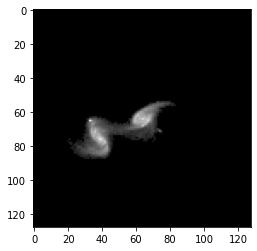

In [7]:
# Function in Image Creator that modifes
# exsiting target images to match new image

# Create and return new target image
n, tImg = ic.adjustTargetImage( tInfo, new_params[newName], overWrite=True, printAll = True )
print( 'n', n )
print( type( tImg ) )
print( tImg )

if type(tImg) != type(None):
    plt.imshow( tImg, cmap='gray')

else:
    print("WARNING!  Target image not found")

___
## Step 5
### Test if SIMR pipeline can create the new model image!

In [8]:
# Get run info class

# Define arguments for executing simr
newImgArg = gm.inArgClass( )
newImgArg.setArg( 'rInfo', rInfo )  # Give rInfo
newImgArg.setArg( 'scoreParams', new_params )  # Give new parameter
newImgArg.setArg( 'printAll', True )  # Print all if you need to troubleshoot
newImgArg.setArg( 'newSim', True )  # Make true if you want new image
newImgArg.setArg( 'zipSim', True )  # Make sure it can create a new score as well.
newImgArg.setArg( 'newImage', True )  # Make true if you want new image
newImgArg.setArg( 'newScore', True )  # Make sure it can create a new score as well.
#newImgArg.setArg( 'overWrite', True )  # Make true if you need to overwrite

# Run through simr image creation
simr.run_new_score( rInfo=rInfo, cmdArg = newImgArg )
rInfo.printScores(allScores=True)

SIMR.run_new_score: 
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.run_new_score: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7ff2e0f173d0>
	 - runID: run_0000
	 - No new scores
IM: run_info_class.printScores()
	 - run_id: run_0000
	 - zoo_merger: 0.9459459459459459
	 - machine_scores: 3
	 - dl-s1-0: 0.992611
	 - dl-s1_seed: 0.992495
	 - dl-s1-seed: 0.992470


___
## Step 5.1
### View results for the new Model Image!

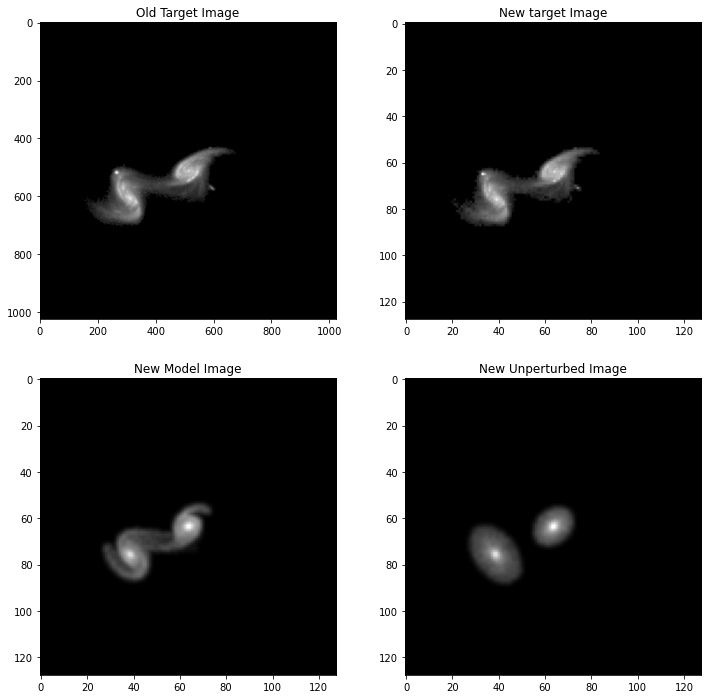

In [9]:
# View new model image next to target image
mImg = rInfo.getModelImage( newName )
iImg = rInfo.getModelImage( newName, imgType='init' )

fig, ax = plt.subplots(2,2,figsize=(12,12))

ax[0,0].set_title("Old Target Image")
ax[0,0].imshow( tInfo.getTargetImage(old_param['cmpArg']['targetName']), cmap='gray' )

ax[0,1].set_title("New target Image")
ax[0,1].imshow( tImg, cmap='gray' )

ax[1,0].set_title("New Model Image")
ax[1,0].imshow( mImg,cmap='gray')

ax[1,1].set_title("New Unperturbed Image")
ax[1,1].imshow( iImg, cmap='gray' )

___
## Step 6
### Save your new image parameters!

In [10]:
# Add to target image repository
tInfo.addImageParams( new_params )

tInfo.addScoreParameters( new_params )
tInfo.saveInfoFile()

# Or save to a location of your choosing
tInfoLoc = tInfo.get("infoDir")
imgParamLoc = '../param/' + 'dl-s1-seed.json'
gm.saveJson( new_params, imgParamLoc )

## Step 7: Create script for all Runs

In [20]:
def buildPyCmd( cmdArg ):
    
    # initialize cmd
    cmd = 'python3 main_SIMR.py'
    
    # Most common arguments I would use in command line
    
    printArg = [ 'printBase', 'printAll', 'printRunBase', 'printRunAll' ]
    dirArg   = [ 'runDir', 'targetDir', 'dataDir' ]
    paramArg = [ 'scoreParamLoc', 'scoreParamName', ]
    simrArg  = [ 'newSim', 'zipSim', 'newImage', 'newScore', 'overWrite' ]
    newArg   = [ 'newInfo', 'newBase', 'newRunInfo', 'newRunBase' ]
    iterArg  = [ 'startRun', 'endRun', 'skipRun' ]
    
    # T/F Print args
    for p in printArg:
        val = cmdArg.get( p, None )
        if val != None: cmd += ' -%s %s' % (p, val)
    
    # Str directories
    for d in dirArg:
        val = cmdArg.get( d, None )
        if val != None: cmd += ' -%s %s' % (d, val)
        
    #Parameter Args
    for p in paramArg:
        val = cmdArg.get( p, None )
        if val != None: cmd += ' -%s %s' % (p, val)
    
        
    # Str directories
    for s in simrArg:
        val = cmdArg.get( s, None )
        if val != None: cmd += ' -%s %s' % (s, val)
        
    # New target/runs
    for n in newArg:
        val = cmdArg.get( n, None )
        if val != None: cmd += ' -%s %s' % (n, val)
        
    # iter Args
    for i in iterArg:
        val = cmdArg.get( i, None )
        if val != None: cmd += ' -%s %s' % (i, val)
        
    return cmd 

# Define arguments for executing simr
testArg = gm.inArgClass( )
testArg.setArg( 'targetDir', 'dataDir/%s/' % tInfo.get('target_id')  )  # Give rInfo
testArg.setArg( 'scoreParamName',  newName )  # Give new parameter
testArg.setArg( 'printAll', True )  # Print all if you need to troubleshoot
testArg.setArg( 'printRunBase', True )  # Print all if you need to troubleshoot
# testArg.setArg( 'newSim', True )  # Make true if you want new image
# testArg.setArg( 'zipSim', True )  # Make sure it can create a new score as well.
# testArg.setArg( 'newImage', True )  # Make true if you want new image
# testArg.setArg( 'newScore', True )  # Make sure it can create a new score as well.
# testArg.setArg( 'overWrite', True )  # Make true if you need to overwrite

# Run through simr image creation
#simr.run_new_score( rInfo=rInfo, cmdArg = testArg )


pyCmd = buildPyCmd( testArg ) 
print( pyCmd )


python3 main_SIMR.py -printBase True -printAll True -printRunBase True -targetDir dataDir/587722984435351614/ -scoreParamName dl-s1-seed
#!/bin/bash 
#$ -N test_dl-s1-0 
#$ -pe mpi 16 

cd galaxyJSPAM/ 
source simr_env/bin/activate 
mpirun -n $NSLOTS python3 main_SIMR.py -printBase True -printAll True -printRunBase True -targetDir dataDir/587722984435351614/ -scoreParamName dl-s1-seed


In [ ]:
dataDir = '../dataDir/'

import os

tNames = os.listdir( dataDir )
tNames.sort()
print( tNames )

In [31]:
dataDir = '../dataDir/'

import os

tNames = os.listdir( dataDir )
tNames.sort()
print( tNames )

['1237678620102623480', '587722984435351614', '587724234257137777', '587726033843585146', '587727177926508595', '587727178988388373', '587727222471131318', '587728676861051075', '587729227151704160', '587731913110650988', '587732136993882121', '587732772130652231', '587733080814583863', '587734862680752822', '587735043609329845', '587735665840881790', '587736523764334706', '587736941981466667', '587738569246376675', '587738569249390718', '587739153356095531', '587739407868690486', '587739505541578866', '587739646743412797', '587739647284805725', '587739707420967061', '587739720308818095', '587739721376202860', '587739721900163101', '587739810496708646', '587739845393580192', '587741391565422775', '587741532784361481', '587741534400217110', '587741602030026825', '587741722819493915', '587741817851674654', '587741829658181698', '587742010583941189', '587742014353702970', '587742571610243080', '587745402001817662', '587746029596311590', '587747120521216156', '588007005230530750', '5880111

In [13]:

timgList = []
titleList =  []

# Define arguments for executing new run
newImgArg = gm.inArgClass( )
newImgArg.setArg( 'scoreParams', new_params )  # Give new parameter
newImgArg.setArg( 'printAll', False )  # Print all if you need to troubleshoot
newImgArg.setArg( 'printBase', False )  # Print all if you need to troubleshoot
newImgArg.setArg( 'newSim', True )  # Make true if you want new image
newImgArg.setArg( 'zipSim', True )  # Make sure it can create a new score as well.
newImgArg.setArg( 'newImage', True )  # Make true if you want new image
newImgArg.setArg( 'newScore', False )  # Make sure it can create a new score as well.
#newImgArg.setArg( 'overWrite', True )  # Make true if you need to overwrite

for t in tNames:
    
    tdir = gm.validPath( dataDir + t  )
    tInfo = im.target_info_class( targetDir = tdir )
    
    # Skip if status is bad
    if tInfo.status == False:
        print( "BAD TARGET: %s" % t)
        continue
            
    # Grab original image with parameters
    old_name = 'zoo_0'
    old_params = tInfo.getImageParams(  )
    old_param = old_params[old_name]

    # Create new target image
    tParam, tImg = ic.adjustTargetImage( tInfo, new_params[newName], overWrite=True, printAll = False, )
    
    # Get first model and test new parameters
    # rInfo = tInfo.getRunInfo()
    # rInfo.printBase = False
    # simr.run_new_score( rInfo=rInfo, cmdArg = newImgArg )
    mImg = rInfo.getModelImage( newName )

    print(  t, type( mImg ) )
    
    # Save image and target id
    timgList.append( mImg )
    titleList.append( tInfo.get('target_id') )
   

    #print(t, type(timg) )

1237678620102623480 <class 'numpy.ndarray'>
587722984435351614 <class 'numpy.ndarray'>
587724234257137777 <class 'numpy.ndarray'>
587726033843585146 <class 'numpy.ndarray'>
587727177926508595 <class 'numpy.ndarray'>
587727178988388373 <class 'numpy.ndarray'>
587727222471131318 <class 'numpy.ndarray'>
587728676861051075 <class 'numpy.ndarray'>
587729227151704160 <class 'numpy.ndarray'>
587731913110650988 <class 'numpy.ndarray'>
587732136993882121 <class 'numpy.ndarray'>
587732772130652231 <class 'numpy.ndarray'>
587733080814583863 <class 'numpy.ndarray'>
587734862680752822 <class 'numpy.ndarray'>
587735043609329845 <class 'numpy.ndarray'>
587735665840881790 <class 'numpy.ndarray'>
587736523764334706 <class 'numpy.ndarray'>
587736941981466667 <class 'numpy.ndarray'>
587738569246376675 <class 'numpy.ndarray'>
587738569249390718 <class 'numpy.ndarray'>
587739153356095531 <class 'numpy.ndarray'>
587739407868690486 <class 'numpy.ndarray'>
587739505541578866 <class 'numpy.ndarray'>
5877396467

In [40]:

def buildBabCmd( pyCmd, name = 'test_babbage', cores = 16 ):
    
    cmd  = '#!/bin/bash \n'
    cmd += '#$ -N %s \n' % name
    cmd += '#$ -pe mpi %d \n' % cores
    cmd += '\n'
    cmd += 'cd galaxyJSPAM/ \n'
    cmd += 'source simr_env/bin/activate \n'
    cmd += 'mpirun -n $NSLOTS %s \n' % pyCmd
    
    return cmd


print( buildBabCmd( pyCmd, name='test_dl-s1-0' ) )

expDir = '../Experiments/dl-s1-0/'

def createQueue( expDir, name='' ):
    
    # Define testing arguments
    testArg = gm.inArgClass( )
    testArg.setArg( 'targetDir', 'targetDir/' )  # Give rInfo
    testArg.setArg( 'scoreParamName',  newName )  # Give new parameter
    testArg.setArg( 'printAll', True )  # Print all if you need to troubleshoot
    testArg.setArg( 'printRunBase', True )  # Print all if you need to troubleshoot
    testArg.setArg( 'newSim', True )  # Make true if you want new image
    testArg.setArg( 'zipSim', True )  # Make sure it can create a new score as well.
    testArg.setArg( 'newImage', True )  # Make true if you want new image
    testArg.setArg( 'newScore', True )  # Make sure it can create a new score as well.
    testArg.setArg( 'overWrite', True )  # Make true if you need to overwrite
    testArg.setArg( 'startRun', 0 )
    testArg.setArg( 'endRun', 32 )
    
    pyCmd = buildPyCmd( testArg ) 
    babCmd = buildBabCmd( pyCmd, name='test_%s'%name )
    
    testLoc = expDir + 'test.qsub'
    tFile = open( testLoc, 'w' )
    tFile.write( babCmd )
    tFile.close()
    
    print("\n" + "##############   TEST   ##################\n" )
    print( babCmd )
    
    seedArg = gm.inArgClass( )
    seedArg.setArg( 'scoreParamName',  newName )  # Give new parameter
    seedArg.setArg( 'newSim', True )  # Make true if you want new image
    seedArg.setArg( 'zipSim', True )  # Make sure it can create a new score as well.
    seedArg.setArg( 'newImage', True )  # Make true if you want new image
    seedArg.setArg( 'newScore', True )  # Make sure it can create a new score as well.
    seedArg.setArg( 'overWrite', True )  # Make true if you need to overwrite
    for t in tNames:
        seedArg.setArg( 'targetDir', 'dataDir/%s/' % t )
        
        pyCmd = buildPyCmd( seedArg )
        babCmd = buildBabCmd( pyCmd, name='%s_%s' % (name, t) )
    
        qLoc = expDir + '%s.qsub' % t
        qFile = open( qLoc, 'w' )
        qFile.write( babCmd )
        qFile.close()
    
        print( babCmd )

    
createQueue(expDir, name = 'dl-s1-0')

#!/bin/bash 
#$ -N test_dl-s1-0 
#$ -pe mpi 16 

cd galaxyJSPAM/ 
source simr_env/bin/activate 
mpirun -n $NSLOTS python3 main_SIMR.py -printBase True -printAll True -printRunBase True -targetDir dataDir/587722984435351614/ -scoreParamName dl-s1-seed 


##############   TEST   ##################

#!/bin/bash 
#$ -N test_dl-s1-0 
#$ -pe mpi 16 

cd galaxyJSPAM/ 
source simr_env/bin/activate 
mpirun -n $NSLOTS python3 main_SIMR.py -printBase True -printAll True -printRunBase True -targetDir targetDir/ -scoreParamName dl-s1-seed -newSim True -zipSim True -newImage True -newScore True -overWrite True -startRun 0 -endRun 32 

#!/bin/bash 
#$ -N dl-s1-0_1237678620102623480 
#$ -pe mpi 16 

cd galaxyJSPAM/ 
source simr_env/bin/activate 
mpirun -n $NSLOTS python3 main_SIMR.py -printBase True -printAll False -targetDir dataDir/1237678620102623480/ -scoreParamName dl-s1-seed -newSim True -zipSim True -newImage True -newScore True -overWrite True 

#!/bin/bash 
#$ -N dl-s1-0_587722984435351614 
#

## Step 7: Apply to all targets? 

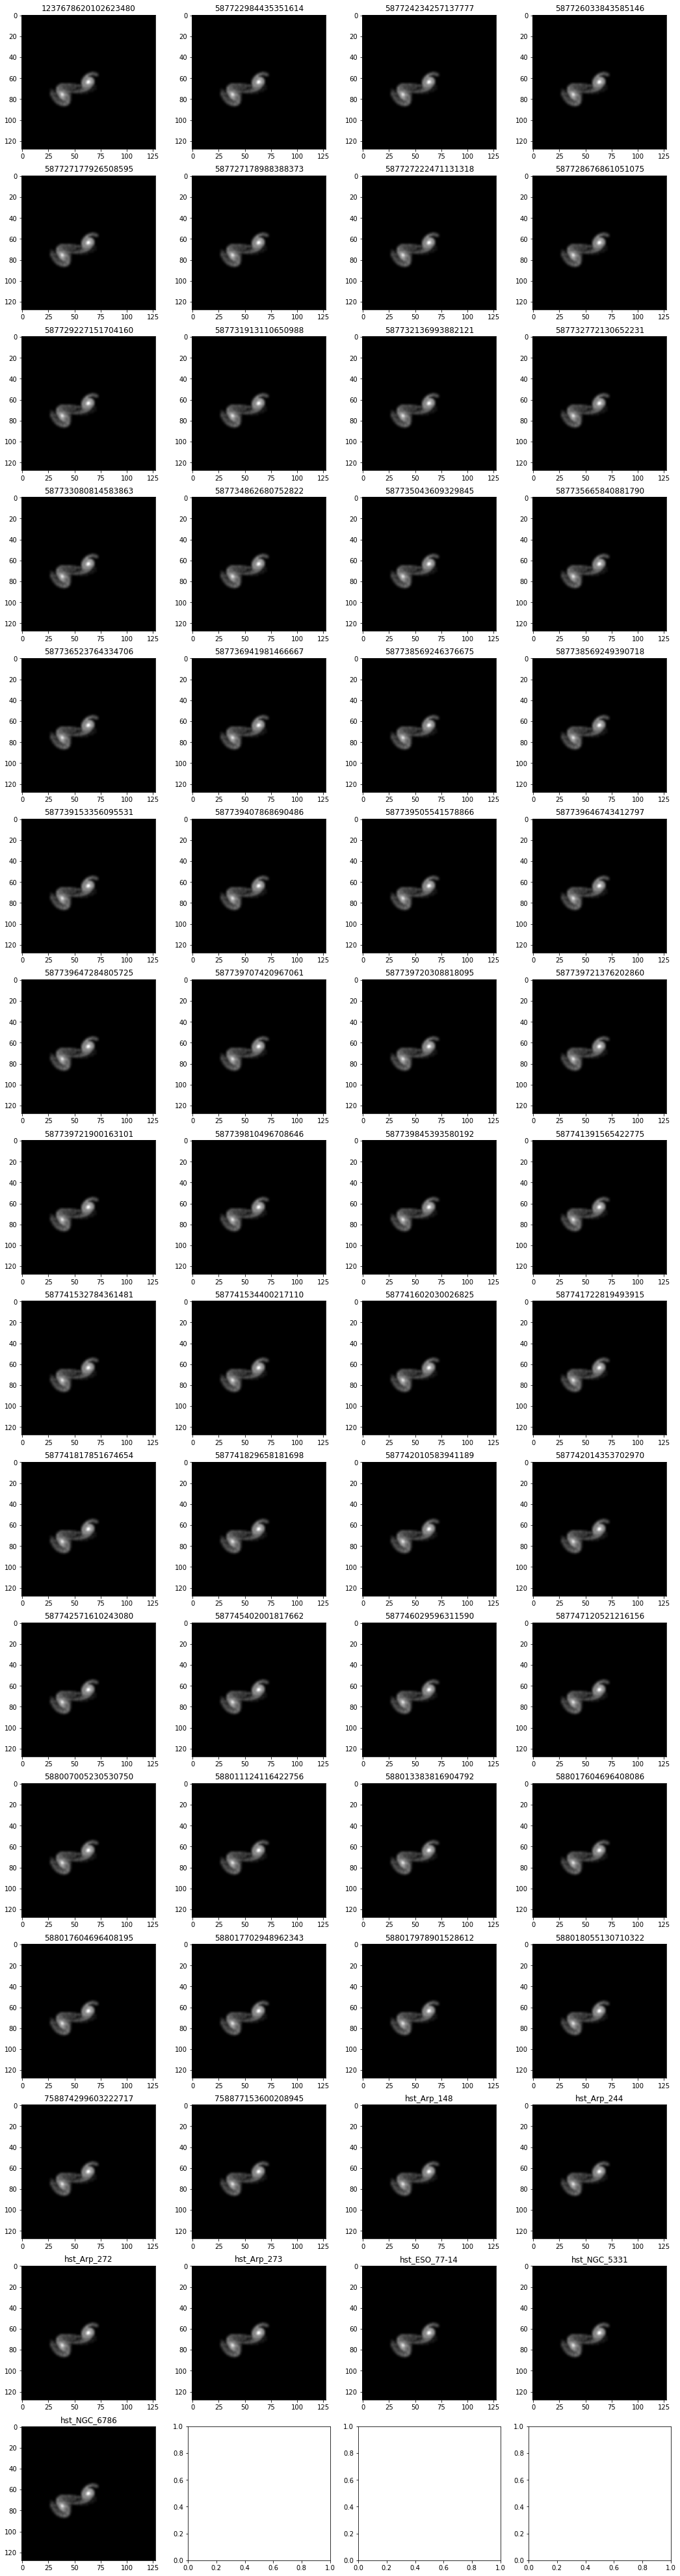

In [14]:
def showImgList( imgList, titleList = None, col_count=4, cmap='gray', size = 12 ):
    
    n = len( imgList )
    from math import ceil
    
    row_count = ceil( n / col_count )
    
    # Assuming square images
    width = size
    height = int( width * ( row_count / col_count ) )
    
    # Create title list if not given
    if titleList == None:
        titleList = range( n )
    
    # Initialize figure
    fig, ax = plt.subplots( row_count, col_count, figsize=(width,height) )
    
    ri, ci = 0, 0
    for i, img in enumerate( imgList ):
    
        pass
        ax[ri,ci].set_title( titleList[i] )
        
        # Only show if valid image
        if type(img) != type(None): ax[ri,ci].imshow( imgList[i] , cmap=cmap )
        
        # Iterate indices
        ci += 1
        if ci >= col_count:
            ci = 0
            ri += 1

showImgList( timgList, titleList, size = 18 )

In [15]:
print("HI")

HI
